In [190]:
%cd /content/sample_data

/content/sample_data


# **Task 1 - 15 points**
Predict house price of King county in the USA by modifying the linear regression sample code provided in Practice 2 at the class. Dataset and code will be available in the class file directory.

A. Linear Regression: Code in Practice 2

B. Dataset: Dataset in class file directory

C. The price should be predicted with features of bedrooms, yr_built, and grade

D. Performance metric should include training loss

E. You should predict the price with the following data (3 bedrooms, Year 1980, grade 8)

In [123]:
# Library

import pandas as pd  # data handeling
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [124]:
df = pd.read_csv("kc_house_data.csv")  # create a dataframe with pandas 
df.dropna(inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [125]:
# use 300 samples for fast experimentation, for final run, you may
# run the entire dataset
#df = df.iloc[:300, :]
#df = df.iloc[:, :]

In [126]:
#getting to know about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [127]:
#find the mean, count, min, max, percentile, standard deviation of given data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576200e+04,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,4.593364e+09,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,0.229984,3.410862,7.663748,1792.775473,1971.111217,82.440236,98077.558241,47.559177,-122.213520,1990.219579,12900.415556
std,2.876078e+09,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.761324,0.651961,1.172238,828.403502,29.336823,397.212626,53.414906,0.138629,0.140706,684.142495,27977.230059
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125159e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,1846.000000,7620.000000
75%,7.334501e+09,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10107.500000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [128]:
#checking for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Let's check for duplicate observations. 

I'll do this two ways: first by searching for observations that are completely identical, and then by searching for duplicate values in the id column, since I believe that to be a unique identifier for each home sale.

In [129]:
# Check for duplicate records
print('Number of duplicate records: ', sum(df.duplicated()))

Number of duplicate records:  0


In [130]:
# Check for duplicate IDs
display(df['id'].value_counts().head())

# Count non-unique IDs
id_value_counts = df['id'].value_counts()
num_repeat_ids = len(id_value_counts[id_value_counts > 1])*2 + 1
print('Number of non-unique IDs: ', num_repeat_ids)

7853400250    2
4139420590    2
1788900230    2
302000375     2
3578401060    2
Name: id, dtype: int64

Number of non-unique IDs:  173


I can see both from the value counts and from my calculation that there are a number of non-unique values in the id column, but these are few in relation to the overall size of the dataset.

If the records are not identical, and just the ids are repeated, how are these records different from one another?

In [131]:
# Inspect a few of the records with duplicate IDs
display(df[df['id'] == 795000620])
display(df[df['id'] == 1825069031])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789


On inspection, I can see that the observations really are different even when the id value is the same: different dates, different prices, etc. 

Since I expect to drop the id column before modeling anyway, I will leave these observations in the dataset and assume that they represent different sales of the same house or some other meaningful difference.

## Initial cleaning

As we only need these features, such as bedrooms, yr_built, and grade, to predict the house's price. We could skip the step of dealing with null variables. 

Here we see the average home price is about 540,000 with the highest being sold for nearly $800,000. The maximum number of bedrooms is 33 which may indicate a mistype, as the average number of bedrooms is about 3. 

In [132]:
# Dropping outlier from the data
df[df['bedrooms']== 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [133]:
df['price'].mean()/df['bedrooms'].mean()

160202.8074879363

In [134]:
df.shape

(15762, 21)

In [135]:
df.drop(15856, axis = 0, inplace = True)
# reset index, because a row is droped.
df.reset_index(drop=True, inplace = True)
df.shape

(15761, 21)

It seems that the house with number of bedrooms 33 is an outlier. Checking the row for that value it was a 1620 square feet house with 1.75 bathrooms and a sale value of 640000. The average price per bedroom house calculated is 160223.5. So this entry is unreliable and is omitted from further analysis.

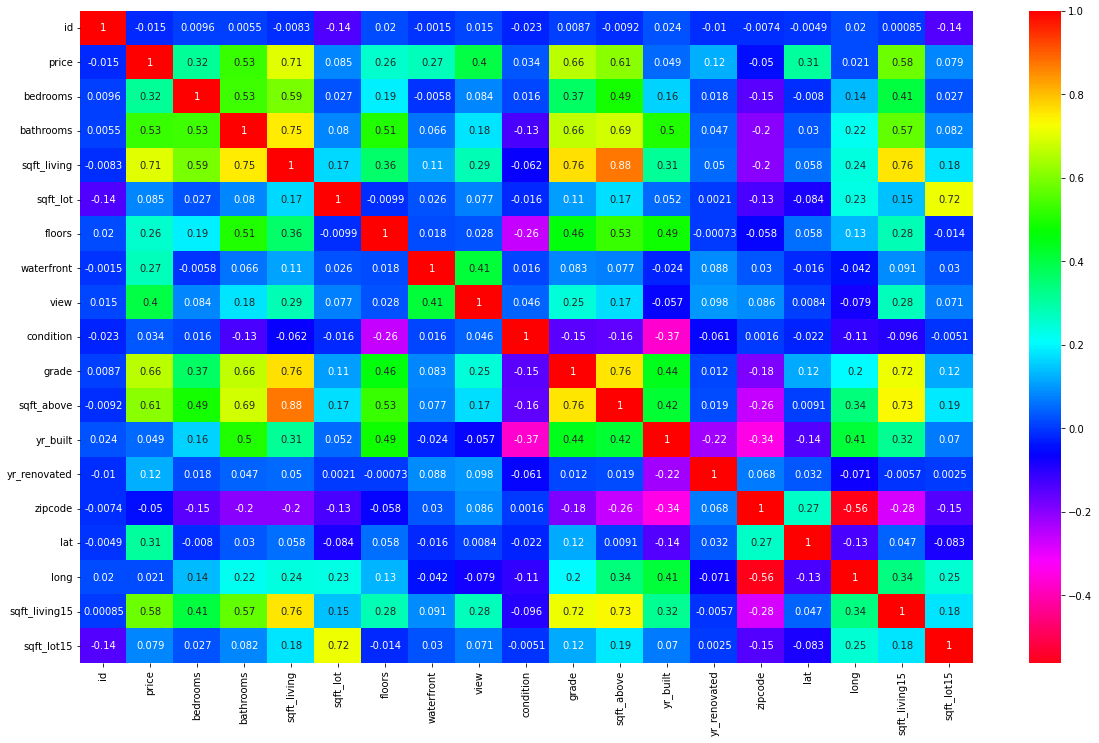

In [136]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(), cmap ='hsv_r', annot = True);

In [137]:
df.corr().unstack().sort_values(ascending = False).drop_duplicates()

id           id               1.000000
sqft_living  sqft_above       0.876176
             grade            0.764246
grade        sqft_above       0.758284
sqft_living  sqft_living15    0.756674
                                ...   
condition    floors          -0.260927
zipcode      sqft_living15   -0.280067
             yr_built        -0.344237
yr_built     condition       -0.366888
zipcode      long            -0.562145
Length: 172, dtype: float64

In [138]:
eta = 0.5    # learning rate
epoch = 1000 # iteration
eta *= 0.95

## Neural Network Model for Linear Regression

Single layer neural network with linear activation function.

In forward processing, it uses MSE (mean square error) loss function.

In backward processing, delta = output - target.

Backward processing is called "backprop".

In [139]:
class LinearRegression:
    def __init__(self, x, w, y):
        self.inputs  = x
        self.weights = w               
        self.target  = y
        self.output  = np.zeros(self.target.shape)
    def forward_proc(self):
        # forward processing of inputs and weights
        self.output = np.dot(self.weights, self.inputs.T)
    def backprop(self):
        # backward processing of appling the chain rule to find derivative of the mean square error function with respect to weights
        dw = (self.output - self.target) * self.inputs
        # update the weights with the derivative of the loss function
        self.weights -= eta * dw
    def predict(self, x):
        # predict the output for a given input x
        return (np.dot(self.weights, x.T))
    def calculate_error(self):
        # calculate error
        error = self.target - self.output
        return abs(error)

Initial Weights: [[0.94316402 0.78188654 0.39310549]]
Loss:  [0.00265063]
Loss:  [0.12473804]
Loss:  [0.04899139]
Loss:  [0.01138313]
Loss:  [0.03398721]
Loss:  [0.02543231]
Loss:  [0.01126935]
Loss:  [0.01711582]
Loss:  [0.01224165]
Loss:  [0.01287745]
Loss:  [0.01779356]
Loss:  [0.02526144]
Loss:  [0.07801654]
Loss:  [0.02681902]
Loss:  [0.00374133]
Loss:  [0.0459277]
Loss:  [0.04103277]
Loss:  [0.00905174]
Loss:  [0.0235277]
Loss:  [0.02643274]


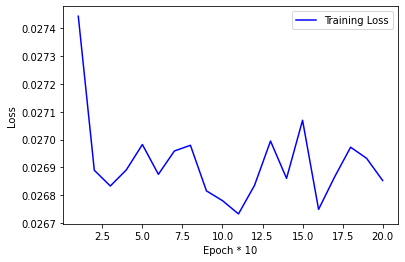

Output: [0.02788261]
Adjusted Weights: [[-0.02055336 -0.06836284  0.19436998]]


In [140]:
if __name__ == "__main__":

    # data normalization on number of rooms and age of the house
    # select features and labels for prediction
    features = df[["bedrooms", "yr_built", 'grade']].values
    labels = df[["price"]].values
    # normalize data
    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    features = scaler_X.fit_transform(features)
    labels = scaler_Y.fit_transform(labels) 
    weights = np.random.rand(1, 3)
    # weights = np.array([ 0.70579101, 0.62761976, 0.17335884 ])
    weights = weights.reshape(1,3)
    
    
    print("Initial Weights:", weights)
    training_loss = []

    # SGD Optimization
    for i in range(epoch):
   
        if i == 0: w=weights
        else: w=model.weights

        concat_data = np.concatenate((features, labels), axis = 1)
        np.random.shuffle(concat_data) # shuffle the dataset

        X = concat_data[:, 0:3]
        y = concat_data[:, 3:4]

        loss_sum = 0
        
        for j in range(len(features)):
         
            model = LinearRegression(X[j], w, y[j])
            model.forward_proc()   # forward processing
            model.backprop()       # backward processing
            w = model.weights 
            loss_sum += model.calculate_error()

        if (i % 50) == 0:
          training_loss.append(loss_sum / len(X)) 
          print("Loss: ", model.calculate_error())

    # show the training loss
    epoch_count = range(1, len(training_loss) + 1)
    plt.plot(epoch_count, training_loss, 'b-')
    plt.legend(['Training Loss'])
    plt.xlabel('Epoch * 10')
    plt.ylabel('Loss')
    plt.show()

    print("Output:", model.output)
    print("Adjusted Weights:", model.weights)

In [141]:
new_features = np.array([[3, 1980, 8]])
new_features = scaler_X.transform(new_features)
predicted_value = model.predict(new_features)
print("Predicted price for 3 beds, year 1980, grade 8 is:", int(scaler_Y.inverse_transform(predicted_value)))  

Predicted price for 3 beds, year 1980, grade 8 is: 428752


# **Task 2 - 15 points**

Predicting the survival of Titanic passengers by modifying the logistic regression sample code provided in Practice 2 at the class. You are going to use the famous Titanic dataset. Both the sample code and dataset are available in the class file directory. This is a binary classification problem: Based on passengers’ stats, predict whether a passenger will survive from the aground Titan or not. The dataset should be split into training data and test data with 80:20 ratio.

A. Logistic Regression: Code in Practice 2 <br>
B. Dataset: Dataset in class file directory <br>
C. The classification, i.e., survival, is based on sex, age and economic status (Pclass) of 
the dataset. You should extend the code provided in Practice 2 for classification using 
these features. <br>
D. Performance metrics should include the confusion matrix, accuracy score, 
classification report. You can measure the performance in both training and test data, 
but submit the performance metrics in test data only. 

In [185]:
import numpy as np
import random

eta = 0.6  # learning rate
epoch = 8000 # iteration

## Logistic regression

In [186]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

# Logistic Regression Model
class LogisticRegression:
    
    def __init__(self, x, w, y):
        self.inputs  = x
        self.weights = w               
        self.target  = y
        self.output  = np.zeros(self.target.shape)

    def forward_proc(self):
       # forward processing of inputs and weights using sigmoid activation function 
        self.output = sigmoid(np.dot(self.weights, self.inputs.T))

    def backprop(self):
        # backward processing of appling the chain rule to find derivative of the mean square error function with respect to weights
        dw = (self.output - self.target) * self.inputs # same formular for both linear and logistic regression

        # update the weights with the derivative of the loss function
        self.weights -= eta * dw

    def predict(self, x):
        # predict the output for a given input x
        return (sigmoid(np.dot(self.weights, x.T)))
        
    def calculate_error(self):
        # calculate error
        error = -self.target * math.log(self.output) - (1-self.target) * math.log(1-self.output)
        return abs(error)

In [187]:
# load dataset
df = pd.read_csv("titanic_data.csv") 
df.dropna(inplace=True)
# preprocess dataset by changing the string to integer, and filling

df['Sex'] = df['Sex'].map({'female':1,'male':0})
df['Age'].fillna(value=df['Age'].mean(), inplace=True) 
# initially experiment with 100 samples. For final run, use full dataset
df = df.iloc[:, :]
# select proper features for prediction
passengers = df[["Sex", "Age", "Pclass","Survived"]] 
# split train and test set
train, test = train_test_split(passengers, test_size=0.2)

In [192]:
# Training 

if __name__ == "__main__":

    
    train_features = train[["Sex", "Age", "Pclass"]].values
    train_labels = train[["Survived"]].values
    test_features = test[["Sex", "Age", "Pclass"]].values
    test_labels = test[["Survived"]].values
    scaler = MinMaxScaler()
    train_features = scaler.fit_transform(train_features) 
    test_features = scaler.fit_transform(test_features) 

    target = [[1.0], [0.0]]  
              
    # weights = np.random.rand(1, 3)
    weights = np.array([3.49045165, -0.80894269, -0.73375843 ])
    weights = weights.reshape(1,3)
    print("Initial Weights:", weights)

  
    # SGD Optimization
    for i in range(epoch):
   
        if i == 0: w = weights
        concat_data=np.concatenate((train_features, train_labels), axis = 1)
        np.random.shuffle(concat_data) # shuffle the training dataset 

        X = concat_data[:, 0:3]
        y = concat_data[:, 3:4]
  
        eta *= 0.95  

        for j in range(len(X)): 
       
            model = LogisticRegression(X[j], w, y[j])
            model.forward_proc()   # forward processing
            model.backprop()       # backward processing
            w = model.weights 

        if (i % 1000) == 0:
             print("Loss: ", model.calculate_error())
        
    print("Output:", model.output)
    print("Adjusted Weights:", model.weights)

Initial Weights: [[ 3.49045165 -0.80894269 -0.73375843]]
Loss:  [0.03787909]
Loss:  [0.04914094]
Loss:  [0.42167953]
Loss:  [0.58205114]
Loss:  [0.56862593]
Loss:  [0.05988815]
Loss:  [1.17727944]
Loss:  [0.92517258]
Output: [0.38671486]
Adjusted Weights: [[ 3.49045165 -0.80894269 -0.73375843]]


## Testing and Prediction
* After training, you can verify that the required target is generated for a given input data.

* During testing phase, new input data is feeded to check the output.

* With new input data, the output is predicted.

In [193]:
X = test_features
y = test_labels
w = model.weights # use the weights resulting from training
y_predic = []
for j in range(len(X)):
    model = LogisticRegression(X[j], w, y[j])
    if model.predict(X[j]) >= 0.5:
        y_predic.append(1)
    elif model.predict(X[j]) < 0.5:
        y_predic.append(0) 
results = confusion_matrix(y, y_predic)
print ('Confusion Matrix :')
print(results)
print ('Classification Report : ')
print (classification_report(y, y_predic)) 

Confusion Matrix :
[[14  2]
 [ 4 17]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.81      0.85        21

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



# **Task 3 - 30 points** 
Here, the dataset should be split into training data and test data with
70:30 ratio. You will implement multi-class classification using logistic regression, Naïve Bayes classifier, and Gaussian RBF of SVM. You will compare the performances of these classifiers in terms of accuracy and confusion matrix, recall, precision and F1-score.

In [178]:
import pandas as pd
import seaborn as sn
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import preprocessing

from sklearn.datasets import load_iris

In [179]:
iris = load_iris()
X = iris.data
y = iris.target

# Important point: Normalize the data, because some algorithms will mark errors
X = preprocessing.scale(X)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [181]:
#building models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', decision_function_shape='ovr', C=1)))

In [182]:
#evaluate the created models
results=[]
names=[]
for name, model in models:
      kfold = StratifiedKFold(n_splits=10, shuffle=True)
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
      results.append(cv_results)
      names.append(name)
      print('%s: %f (%f)'% (name, cv_results.mean(), cv_results.std()))

LR: 0.935455 (0.071403)
NB: 0.944545 (0.073231)
SVM: 0.952727 (0.062430)


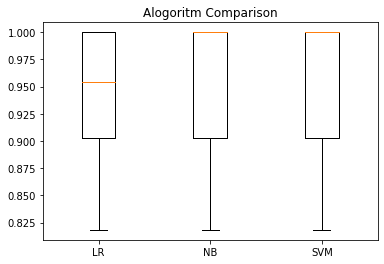

In [183]:
# models comparisons
pyplot.boxplot(results, labels=names)
pyplot.title('Alogoritm Comparison')
pyplot.show()

In [184]:
# make prediction on SVM as it shows the best result
model= SVC(gamma='auto', decision_function_shape='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

0.9777777777777777


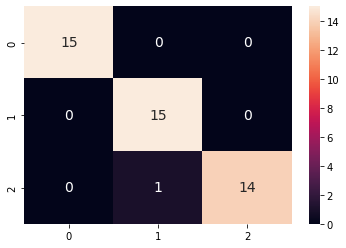

In [185]:
# evaluate our prediction
print(accuracy_score(y_test, predictions))

df_cm = confusion_matrix(y_test, predictions)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}) # font size

# Extra Credit (10 points)

Predict the class of wine using the Wine dataset available at UCI open dataset (https://archive.ics.uci.edu/ml/datasets/wine), with dataset split of 70:30. You should use all features of Wine dataset in getting the accuracy. You should try all 3 models as described above, i.e., Logistic Regression, SVM, and Gaussian RBF for your experimentation, but submit only one model which gives you the best accuracy score.

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [327]:
df = pd.read_csv('wine_set.csv')

In [328]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [329]:
df.columns = [ 'name',
              'alcohol',
              'malicAcid',
              'ash',
              'ashalcalinity',
              'magnesium',
              'totalPhenols',
              'flavanoids',
              'nonFlavanoidPhenols',
              'proanthocyanins',
              'colorIntensity',
              'hue',
              'od280_od315',
              'proline']

In [330]:
df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [331]:
df.isna().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

In [332]:
X = df.drop(['name'], axis=1)
y = df.iloc[:,:1]

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## GaussianNB

In [334]:
model_1 = GaussianNB(priors=[0.32258065, 0.39516129, 0.28225806])
model_1.fit(X_train, y_train.values.ravel())

GaussianNB(priors=[0.32258065, 0.39516129, 0.28225806])

In [337]:
y_pred = model_1.predict(X_train)
print("Accuracy Score training:",accuracy_score(y_train,y_pred))
y_pred2 = model_1.predict(X_test)
print("Accuracy Score testing:", accuracy_score(y_test,y_pred2))

Accuracy Score training: 0.9919354838709677
Accuracy Score testing: 0.9814814814814815


Classification Report : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.95      0.98        21
           3       0.95      1.00      0.97        18

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



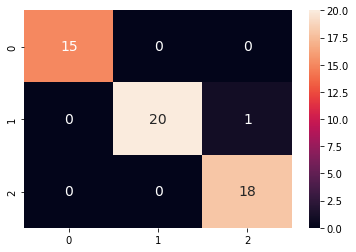

In [338]:
print ('Classification Report : ')
print (classification_report(y_test, y_pred2)) 

df_cm = confusion_matrix(y_test, y_pred2)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}) # font size

## SVM

In [339]:
model_2 = SVC(kernel="linear", C= 0.4, gamma=0.2)
model_2.fit(X_train, y_train.values.ravel())
pred_y1 = model_2.predict(X_train)

print("Accuracy Score training:", accuracy_score(y_train, pred_y1))

pred_y2 = model_2.predict(X_test)
print("Accuracy Score testing:",accuracy_score(y_test, pred_y2))

Accuracy Score training: 1.0
Accuracy Score testing: 0.9629629629629629


Classification Report : 
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       0.95      0.95      0.95        21
           3       1.00      0.94      0.97        18

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



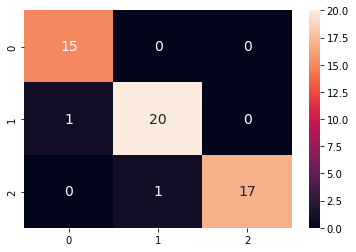

In [340]:
print ('Classification Report : ')
print (classification_report(y_test, pred_y2)) 

df_cm = confusion_matrix(y_test, pred_y2)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}) # font size

## LogisticRegression

In [351]:
model3 = LogisticRegression(C=0.8,random_state=0, max_iter=1000, multi_class="ovr")
model3.fit(X_train, y_train.values.ravel())
Y_pred = model3.predict(X_train)
print("Accuracy Score training:",accuracy_score(y_train, Y_pred))

Y_pred2 = model3.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test, Y_pred2))

Accuracy Score training: 1.0
Accuracy Score: 0.9444444444444444


Classification Report : 
              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.91      0.95      0.93        21
           3       0.95      1.00      0.97        18

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



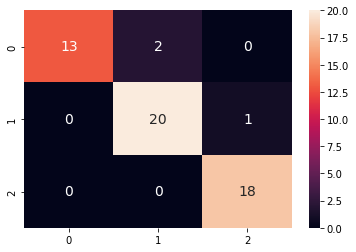

In [352]:
print ('Classification Report : ')
print (classification_report(y_test, y_pred2)) 

df_cm = confusion_matrix(y_test, y_pred2)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}) # font size

GaussianNB showed the best result compared to the other two algorithms.

## Convert to PDF

In [353]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [354]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [358]:
!cp /content/drive/MyDrive/Colab_Notebooks/Machine_Learning/22MD0444_hw1_code.ipynb ./

In [359]:
!jupyter nbconvert --to PDF "22MD0444_hw1_code.ipynb"

[NbConvertApp] Converting notebook 22MD0444_hw1_code.ipynb to PDF
[NbConvertApp] Support files will be in 22MD0444_hw1_code_files/
[NbConvertApp] Making directory ./22MD0444_hw1_code_files
[NbConvertApp] Making directory ./22MD0444_hw1_code_files
[NbConvertApp] Making directory ./22MD0444_hw1_code_files
[NbConvertApp] Making directory ./22MD0444_hw1_code_files
[NbConvertApp] Making directory ./22MD0444_hw1_code_files
[NbConvertApp] Making directory ./22MD0444_hw1_code_files
[NbConvertApp] Making directory ./22MD0444_hw1_code_files
[NbConvertApp] Writing 120264 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 299362 bytes to 22MD0444_hw1_code.pdf
